1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


2. Load Data

In [2]:
# Load data
file_path = "C:\\Users\\harih\\OneDrive\\Desktop\\PROJECT\\P-2\\datasets\\BOOK2.csv"

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()


Data loaded successfully.


3. Data Preprocessing

In [3]:
# Check for missing values
if df.isnull().values.any():
    print("Warning: Missing values detected. Filling missing values.")
    df.fillna(df.mean(), inplace=True)
    print("Missing values filled with column means.")

# Data cleaning
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with missing or NaN values
df.dropna(inplace=True)

# Split data into features (X) and target variable (y)
X = df.iloc[:, 0:-1]  # Features
y = df['AQI']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Data split into training and testing sets.")


Data split into training and testing sets.


4. Model Training

In [4]:
# Construct a pipeline for feature scaling, polynomial features, and Ridge regression
pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge())

# Perform GridSearchCV to tune hyperparameters
param_grid = {'ridge__alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
print("Starting GridSearchCV...")

try:
    grid_search.fit(X_train, y_train)
    print("Model training completed.")
except Exception as e:
    print("Error occurred during model training:", e)
    exit()

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Starting GridSearchCV...
Model training completed.
Best hyperparameters: {'ridge__alpha': 100}


5. Model Evaluation

In [5]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r_squared:.2f}")



Evaluation Metrics:
Mean Absolute Error: 3.63
Mean Squared Error: 21.90
Root Mean Squared Error: 4.68
R-squared: 0.99


6. Visualize Results

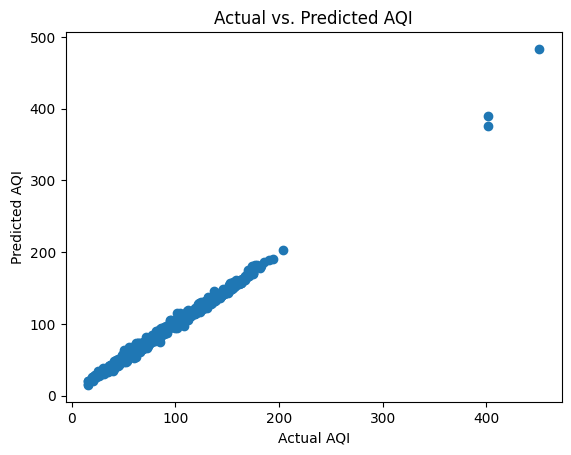

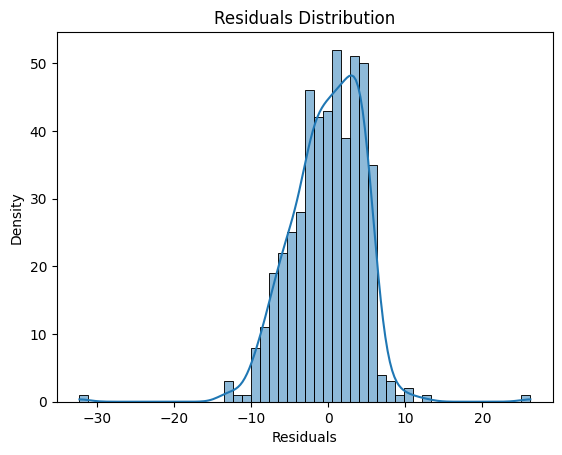

In [6]:
# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs. Predicted AQI")
plt.show()

# Residuals distribution plot
sns.histplot((y_test - y_pred), bins=50, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residuals Distribution")
plt.show()


7. Save Model

In [7]:
# Dump the trained model to a file
try:
    model_filename = "ridge_regression_model.joblib"
    dump(best_model, model_filename)
    print(f"Trained model saved as {model_filename}")
except Exception as e:
    print("Error occurred during model saving:", e)
    exit()


Trained model saved as ridge_regression_model.joblib
